<a href="https://colab.research.google.com/github/franquic/fastAI-Journey/blob/main/is_anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *

from itertools import islice

ddgs = DDGS()
def search_images(term, max_images=30):
    print(f'Searching for \'{term}\'')
    ddgs_images = ddgs.images(term)
    limited_images = list(islice(ddgs_images, max_images))
    return L(limited_images).itemgot('image')

In [3]:
urls = search_images('anime boy', max_images=1)
urls[0]

Searching for 'anime boy'


'https://cdn.wallpapersafari.com/34/93/tl7o3U.jpg'

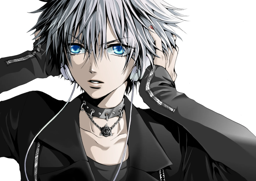

In [4]:
from fastdownload import download_url
dest = 'anime.jpg'
download_url(urls[0], dest)

from fastai.vision.all import *
Image.open(dest).to_thumb(256,256)

Searching for 'photo boy'


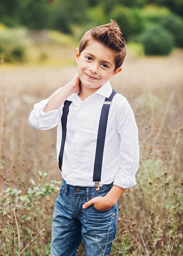

In [5]:
download_url(search_images('photo boy', max_images=1)[0], 'photo.jpg')
Image.open('photo.jpg').to_thumb(256,256)

In [6]:
searches = 'anime', 'photo'
path = Path('photo_or_not')

from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} boy'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} girl'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} young'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'anime boy'
Searching for 'anime girl'
Searching for 'anime young'
Searching for 'photo boy'
Searching for 'photo girl'
Searching for 'photo young'


In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

## Train our model

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


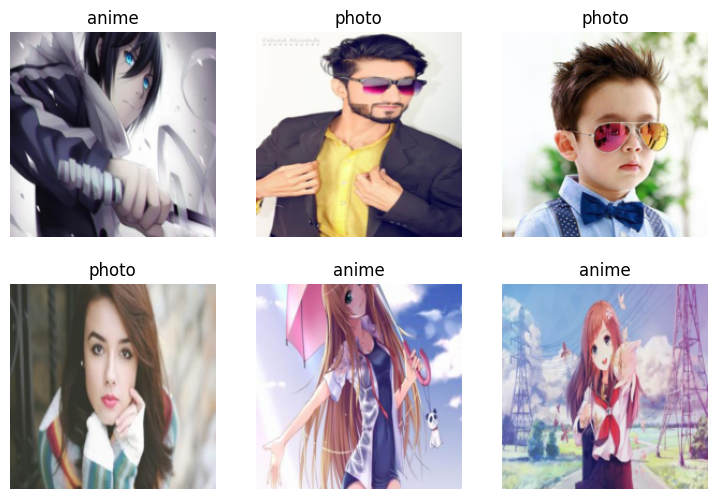

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 114MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.058782,0.216284,0.090909,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.240424,0.051956,0.030303,00:30
1,0.142291,0.024606,0.030303,00:30
2,0.095452,0.015081,0.000000,00:29


## Use our model

In [11]:
is_anime, _, probs = learn.predict(PILImage.create('photo.jpg'))
print(f"This is a {is_anime}")
print(f"Probability it's an anime {probs[0]:.4f}")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


This is a photo
Probability it's an anime 0.0000


In [12]:
is_anime, _, probs = learn.predict(PILImage.create('anime.jpg'))
print(f"This is a {is_anime}")
print(f"Probability it's an anime {probs[0]:.4f}")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


This is a anime
Probability it's an anime 1.0000


Searching for 'anime young'


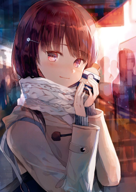

In [13]:
download_url(search_images('anime young', max_images=1)[0], 'anime2.jpg', show_progress=False)
Image.open('anime2.jpg').to_thumb(192, 192)

In [14]:
is_anime, _, probs = learn.predict(PILImage.create('anime2.jpg'))
print(f"This is a {is_anime}")
print(f"Probability it's an anime {probs[0]:.4f}")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


This is a anime
Probability it's an anime 1.0000


Searching for 'photo young'


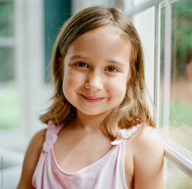

In [15]:
download_url(search_images('photo young', max_images=1)[0], 'photo2.jpg', show_progress=False)
Image.open('photo2.jpg').to_thumb(192, 192)

In [16]:
is_anime, _, probs = learn.predict(PILImage.create('photo2.jpg'))
print(f"This is a {is_anime}")
print(f"Probability it's an anime {probs[0]:.4f}")

This is a photo
Probability it's an anime 0.0002
